In [1]:
import pymongo
from bs4 import BeautifulSoup as bs
import pandas as pd
import requests
from webdriver_manager.chrome import ChromeDriverManager
from splinter import Browser


In [2]:
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'

In [3]:
df = pd.read_html(url)
df[0]

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [4]:
df[0]['terrestrial_date'] = pd.to_datetime(df[0]['terrestrial_date'])
df[0]['terrestrial_date']

0      2012-08-16
1      2012-08-17
2      2012-08-18
3      2012-08-19
4      2012-08-20
          ...    
1862   2018-02-23
1863   2018-02-24
1864   2018-02-25
1865   2018-02-26
1866   2018-02-27
Name: terrestrial_date, Length: 1867, dtype: datetime64[ns]

There are 35 months on Mars. actually, I didn't understand clearly the question, The fact is Mars has 24 months or you want to count months in data set. I supposed in data set that we count how long Curiosity stay on Mars in months, I count when the different in Month column occurred.

How many Martian (and not Earth) days worth of data exist in the scraped dataset?

In [5]:
lastday = df[0]['sol'].iloc[-1:]
firstday = df[0]['sol'].iloc[:1]
print(firstday)
print(lastday)

0    10
Name: sol, dtype: int64
1866    1977
Name: sol, dtype: int64


Simply, we can calculate the range =  lastday value - firstday value = 1977-10= 1967 days on Mars since Curiosity landed on Mars

In [6]:
df1 = df[0].filter(items=['month', 'min_temp'])
df1

,month,min_temp
0,6,-75.0
1,6,-76.0
2,6,-76.0
3,6,-74.0
4,6,-74.0
...,...,...
1862,5,-78.0
1863,5,-77.0
1864,5,-76.0
1865,5,-77.0


In [51]:
df1["month"].iloc[0]

6

In [7]:
avg_temp_df = df1.groupby(df1['month'])['min_temp'].mean()
avg_temp_df

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

In [8]:
coldest_month = df1.groupby(df1['month'])['min_temp'].mean().idxmin()

In [9]:
coldest_avg_temp = df1.groupby(df1['month'])['min_temp'].mean().min()

In [10]:
print(f'The coldest month is {coldest_month} at {coldest_avg_temp} ')

The coldest month is 3 at -83.30729166666667 


In [11]:
warmest_month = df1.groupby(df1['month'])['min_temp'].mean().idxmax()

In [12]:
warmest_avg_temp = df1.groupby(df1['month'])['min_temp'].mean().max()

In [13]:
print(f'The warmest month is {warmest_month} at {warmest_avg_temp} ')

The warmest month is 8 at -68.38297872340425 


In [14]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np

<function matplotlib.pyplot.show(close=None, block=None)>

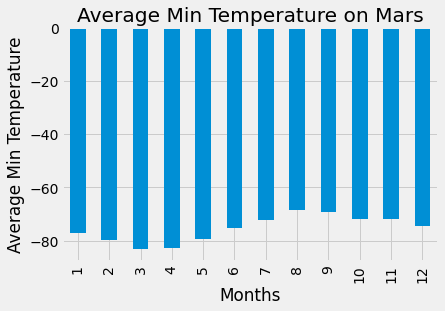

In [15]:
avg_temp_df.plot.bar()
plt.xlabel("Months")
plt.ylabel("Average Min Temperature")
plt.title("Average Min Temperature on Mars")
plt.show

In [16]:
df2 = df[0].filter(items=['month', 'pressure'])
df2

,month,pressure
0,6,739.0
1,6,740.0
2,6,741.0
3,6,732.0
4,6,740.0
...,...,...
1862,5,730.0
1863,5,729.0
1864,5,729.0
1865,5,728.0


In [17]:
p_df = df2.groupby(df2['month'])['pressure'].mean()
p_df

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

In [18]:
# Lowest pressure month and its pressure
lowest_p = p_df.min()
lowest_p_month = p_df.idxmin()
# highest pressure month and its pressure
highest_p = p_df.max()
highest_p_month = p_df.idxmax()
print(f'The lowest atmosphere pressure month is {lowest_p_month} at {lowest_p} ')
print(f'The highest atmosphere pressure month is {highest_p_month} at {highest_p} ')

The lowest atmosphere pressure month is 6 at 745.0544217687075 
The highest atmosphere pressure month is 9 at 913.3059701492538 


<function matplotlib.pyplot.show(close=None, block=None)>

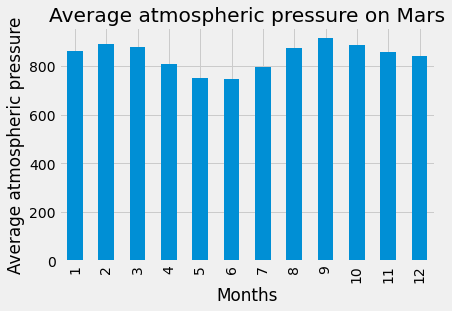

In [19]:
p_df.plot.bar()
plt.xlabel("Months")
plt.ylabel("Average atmospheric pressure")
plt.title("Average atmospheric pressure on Mars")
plt.show

In [20]:
tdays = df[0]['terrestrial_date'].count()
print(f'terrestrial (Earth) days exist in a Martian year are {tdays}')

terrestrial (Earth) days exist in a Martian year are 1867


Since Mars revolves or orbits around the Sun once every 1.88 Earth years
=> 1 year in Mars every circle around Sun =  1.88 x 365 ~ 686.2 days


In [21]:
df3 = df[0].filter(items=['terrestrial_date','min_temp'])
df3

,terrestrial_date,min_temp
0,2012-08-16,-75.0
1,2012-08-17,-76.0
2,2012-08-18,-76.0
3,2012-08-19,-74.0
4,2012-08-20,-74.0
...,...,...
1862,2018-02-23,-78.0
1863,2018-02-24,-77.0
1864,2018-02-25,-76.0
1865,2018-02-26,-77.0


In [22]:
df3 = df3.set_index('terrestrial_date')

In [23]:
df3

,min_temp
terrestrial_date,
2012-08-16,-75.0
2012-08-17,-76.0
2012-08-18,-76.0
2012-08-19,-74.0
2012-08-20,-74.0
...,...
2018-02-23,-78.0
2018-02-24,-77.0
2018-02-25,-76.0


In [34]:
df_2012 = df3['2012-08-16': '2012-12-31']
df_2013 = df3['2013-01-01': '2013-12-31']
df_2014 = df3['2014-01-01': '2014-12-31']
df_2015 = df3['2015-01-01': '2015-12-31']
df_2016 = df3['2016-01-01': '2016-12-31']
df_2017 = df3['2017-01-01': '2017-12-31']
df_2018 = df3['2018-01-01': '2018-02-27']


In [35]:
df_2014

,min_temp
terrestrial_date,
2014-01-01,-85.0
2014-01-02,-86.0
2014-01-03,-87.0
2014-01-04,-86.0
2014-01-05,-85.0
...,...
2014-12-27,-68.0
2014-12-28,-68.0
2014-12-29,-73.0


<AxesSubplot:xlabel='terrestrial_date'>

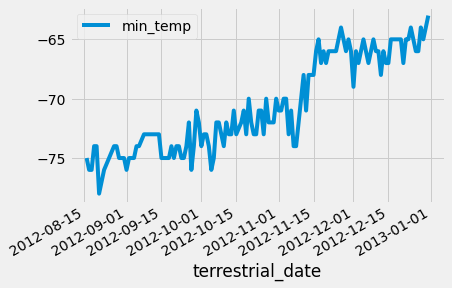

In [30]:
df_2012.plot()

<AxesSubplot:xlabel='terrestrial_date'>

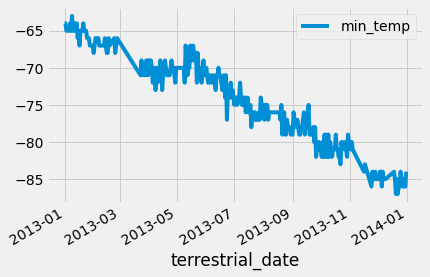

In [36]:
df_2013.plot()

<AxesSubplot:xlabel='terrestrial_date'>

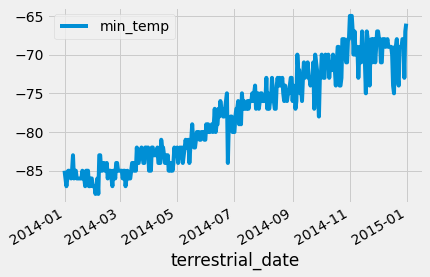

In [37]:
df_2014.plot()

<AxesSubplot:xlabel='terrestrial_date'>

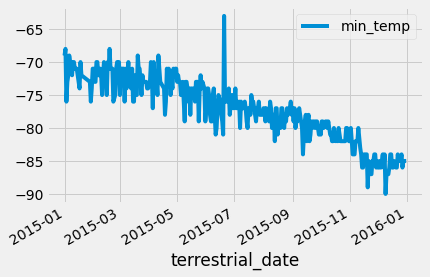

In [38]:
df_2015.plot()

<AxesSubplot:xlabel='terrestrial_date'>

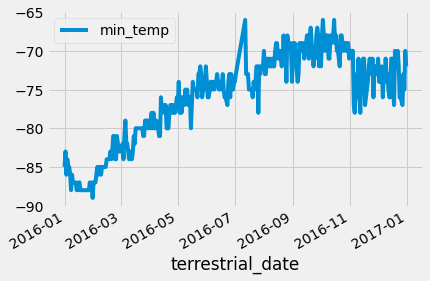

In [40]:
df_2016.plot()

<AxesSubplot:xlabel='terrestrial_date'>

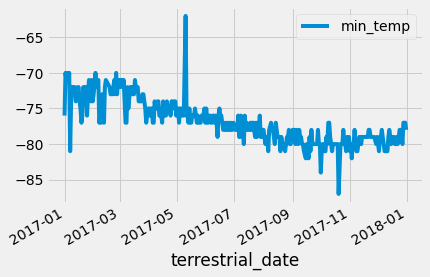

In [41]:
df_2017.plot()

<AxesSubplot:xlabel='terrestrial_date'>

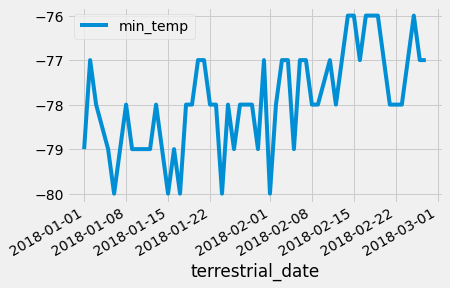

In [42]:
df_2018.plot()

In [43]:
df4 = df[0].to_csv('mars_temp_data.csv')